## Compute Sagnac Frequency - Plotting

## Imports

In [149]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime

## Configurations

In [150]:
config = {}

config['seed'] = "BW.DROMY..FJZ"


config['tbeg'] = UTCDateTime("2023-04-07 00:00")
config['tend'] = UTCDateTime("2023-04-07 00:00")

config['datapath'] = "/home/andbro/kilauea-data/sagnac_frequency/tests/"

In [151]:
!ls /home/andbro/kilauea-data/sagnac_frequency/tests

FJZ_20230407_orig.pkl	 FJZ_20230407_test12.pkl  FJZ_20230407_test16.pkl
FJZ_20230407.pkl	 FJZ_20230407_test13.pkl  FJZ_20230407_test17.pkl
FJZ_20230407_test10.pkl  FJZ_20230407_test14.pkl  OLD
FJZ_20230407_test11.pkl  FJZ_20230407_test15.pkl


normal: 
 - detrend('linear')
 - taper(0.1)
 - filter(bandpass, fsag+-3 Hz)
 

Description of Tests: 

- test10: no preprocessing (= no detrend, no taper, no filter)
- test11: no taper
- test12: no taper, no filter
- test13: no taper, no detrend

- test14: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=5)
- test15: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=10)
- test16: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=3)
- test17: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=3) different order for filter
- test18: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=5) different order for filter
- test19: multitaper_hilbert: (detrend(linear), filter(bandpass), windows=10) different order for filter

- test20: periodogram: overlap=240
- test21: multitaper_periodogram: windows=10, overlap=240
- test22: mulittaper_periodogram: windows=10, overlap=60
- test23: mulittaper_periodogram: windows=20, overlap=240
- test24: periodogram: overlap=60
- test25: periodogram: overlap=600
- test26: mulittaper_periodogram: windows=10, overlap=600

In [228]:
config['tests'] = [
#     'demean_taper',
#     'hilbert_120',
#     'lineardetrend',
#     'multitaper_hilbert',
#     'multitaper',
#     'overlap60',
    
## hilbert    
#     'test10',
#     'test11',
#     'test12',
#     'test13',
    
## multitaper_hilbert
#     'test14',
#     'test15',
#     'test16',
#     'test17',
#     'test18',
#     'test19',

## periodogram
    'test20',
    'test21',
#     'test22',  # no good
    'test23',
#     'test24',  # no good

]

## Load Data

In [197]:
def __load_data(config):
    
    net, sta, loc, cha = config['seed'].split(".")
    
    t1 = date.fromisoformat(str(config['tbeg'].date))
    t2 = date.fromisoformat(str(config['tend'].date))

    df = DataFrame()
    for dat in date_range(t1,t2):
        file = cha+"_"+str(dat)[:10].replace("-","")+"_orig.pkl"

        try:
            df0 = read_pickle(config['datapath']+file)
            df = concat([df, df0])
        except:
            print(f"error for {config['datapath']}{file}")
            
    return df

In [198]:
config['seed'] = "BW.DROMY..FJZ"
fjz = __load_data(config)

In [215]:
def __load_data_tests(config, test):
    
    net, sta, loc, cha = config['seed'].split(".")
    
    t1 = date.fromisoformat(str(config['tbeg'].date))
    t2 = date.fromisoformat(str(config['tend'].date))

    df = DataFrame()
    
    for dat in date_range(t1,t2):
        
        file = "FJ"+cha[-1]+"_"+str(dat)[:10].replace("-","")+"_"+f"{test}.pkl"

        try:
            df0 = read_pickle(config['datapath']+file)
            df = concat([df, df0])
        except:
            print(f"error for {config['datapath']}{file}")

    return df

In [229]:
tests = []

for test in config['tests']:
    tmp = __load_data_tests(config, test)
    tests.append(tmp)

## Plot Frequency

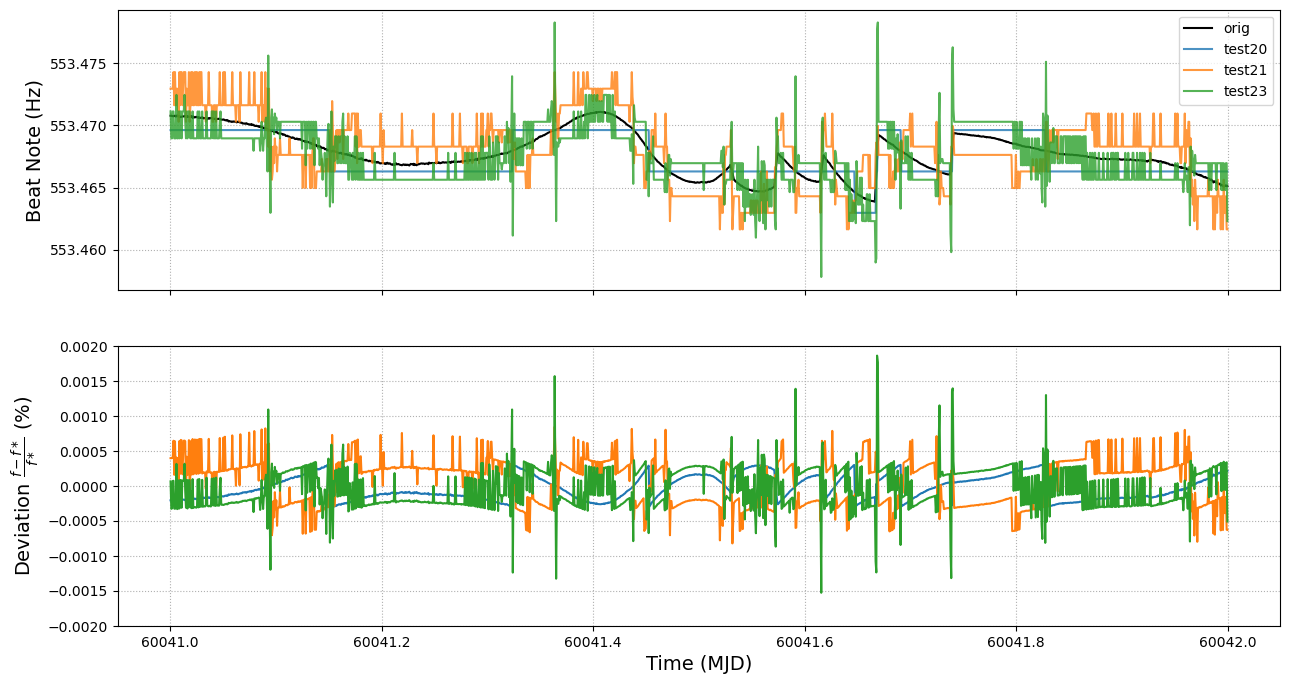

In [230]:
fig, ax = plt.subplots(2,1,figsize =(15,8), sharex=True)

ax[0].plot(fjz.times_mjd, fjz.freqs, color="k", label="orig")

for i, test_name in enumerate(config['tests']):
    ax[0].plot(tests[i].times_mjd, tests[i].freqs, label=test_name, alpha=0.8)

ax[0].legend()


for i, test_name in enumerate(config['tests']):
    ax[1].plot(tests[i].times_mjd, (tests[i].freqs-fjz.freqs)/fjz.freqs*100, label=test_name)
    
    
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].set_xlabel("Time (MJD)", fontsize=14)
ax[0].set_ylabel("Beat Note (Hz)", fontsize=14)
ax[1].set_ylabel(r"Deviation $\frac{f-f*}{f*}$ (%)", fontsize=14)


# ax[0].set_ylim(553.463, 553.472)
ax[1].set_ylim(-.002, .002)

ax[0].grid(ls=":", zorder=-1)
ax[1].grid(ls=":", zorder=-1)

plt.show();